In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from scipy import stats

In [99]:
sns.set_style("white", {'axes.grid' : False})
sns.set_palette("tab20", 16)
sns.set(font="Calibri")
sns.set_context('talk')

In [100]:
df = pd.read_csv('calibration_master_metadata.csv', parse_dates= ['created_at'])
df

,created_at,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5
0,2020-07-15 10:00:00+03:00,Makerere,44.753333,55.150000,43.483333,53.260000,0.793083,23.000000,0.333501,32.568561,1233,6340,21,28,8518,475,61.0
1,2020-07-15 11:00:00+03:00,Makerere,36.145000,42.455000,34.680000,40.605000,0.748417,23.816667,0.333501,32.568561,1233,6340,21,28,8518,475,77.6
2,2020-07-15 12:00:00+03:00,Makerere,37.252222,44.076667,35.420000,42.036667,0.688000,24.850000,0.333501,32.568561,1233,6340,21,28,8518,475,57.6
3,2020-07-15 13:00:00+03:00,Makerere,41.094000,49.526000,39.524000,48.252000,0.656500,25.925000,0.333501,32.568561,1233,6340,21,28,8518,475,42.8
4,2020-07-15 14:00:00+03:00,Makerere,42.662222,52.036667,40.505556,50.114444,0.641583,26.258333,0.333501,32.568561,1233,6340,21,28,8518,475,61.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13656,2021-02-28 23:00:00+03:00,USEmbassy,125.649535,153.449535,121.143721,134.098140,0.869333,22.891667,0.299255,32.592686,1199,4374,21,14,6834,130,57.0
13657,2021-03-01 00:00:00+03:00,USEmbassy,96.100714,117.839524,92.667619,101.586190,0.892500,22.375000,0.299255,32.592686,1199,4374,21,14,6834,130,68.0
13658,2021-03-01 01:00:00+03:00,USEmbassy,89.570000,108.802326,87.543023,95.138605,0.925583,21.933333,0.299255,32.592686,1199,4374,21,14,6834,130,83.0
13659,2021-03-01 02:00:00+03:00,USEmbassy,82.071163,100.374651,81.368837,89.642791,0.914667,22.333333,0.299255,32.592686,1199,4374,21,14,6834,130,78.0


In [101]:
df['difference'] = df.pm2_5 - df.ref_pm2_5

### Difference by hour of the day

In [102]:
df['hour'] = df['created_at'].dt.hour

In [103]:
df_hr_grp = df.groupby(['site', 'hour']).mean().reset_index()
df_hr_grp

,site,hour,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5,difference
0,Makerere,0,58.626867,67.427562,54.729933,65.130093,0.876610,20.068684,0.333501,32.568561,1233,6340,21,28,8518,475,49.401227,9.225640
1,Makerere,1,56.682872,65.376691,52.665754,62.874503,0.893293,19.875716,0.333501,32.568561,1233,6340,21,28,8518,475,46.053374,10.629498
2,Makerere,2,56.534174,65.099830,52.433928,62.582623,0.903220,19.668354,0.333501,32.568561,1233,6340,21,28,8518,475,41.208589,15.325586
3,Makerere,3,62.257395,70.865443,57.534465,67.965128,0.913331,19.446063,0.333501,32.568561,1233,6340,21,28,8518,475,38.516564,23.740831
4,Makerere,4,68.426148,77.457516,64.161672,75.077770,0.918258,19.315072,0.333501,32.568561,1233,6340,21,28,8518,475,36.700617,31.725531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,USEmbassy,19,72.647473,83.856199,65.404482,76.249608,0.784596,22.591615,0.299255,32.592686,1199,4374,21,14,6834,130,42.885093,29.762380
68,USEmbassy,20,71.131733,81.772276,64.159838,74.670867,0.820110,21.889590,0.299255,32.592686,1199,4374,21,14,6834,130,43.582555,27.549179
69,USEmbassy,21,63.810396,73.647204,57.509711,67.157282,0.841910,21.485801,0.299255,32.592686,1199,4374,21,14,6834,130,46.316770,17.493626
70,USEmbassy,22,59.680580,69.037399,53.971783,62.936734,0.858793,21.176446,0.299255,32.592686,1199,4374,21,14,6834,130,53.936909,5.743671


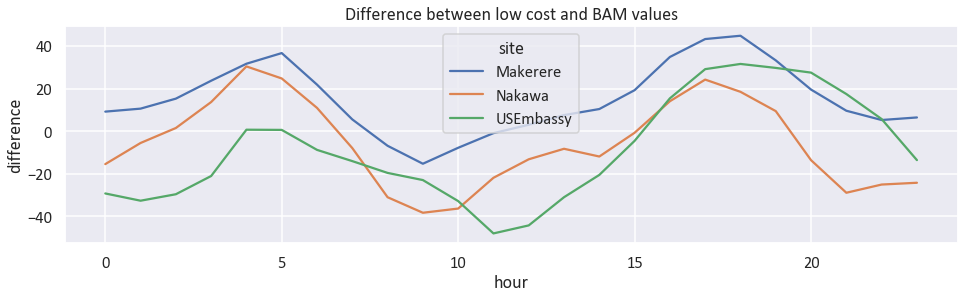

In [104]:
fig, ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=df_hr_grp, x= 'hour', y='difference', hue='site')
plt.title('Difference between low cost and BAM values')
plt.show()

In [128]:
df['doy'] = df['created_at'].dt.weekofyear

In [129]:
df_doy_grp = df.groupby(['site', 'doy']).mean().reset_index()
df_doy_grp.head()

,site,doy,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5,difference,hour,month
0,Makerere,1,44.408493,51.228219,42.217330,49.945901,0.818550,21.943204,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,30.541667,13.866826,11.500000,1.0
1,Makerere,2,86.345255,94.926220,81.544178,92.832689,0.909870,20.984375,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,59.770313,26.574943,10.500000,1.0
2,Makerere,3,66.332639,74.810788,62.403986,72.694590,0.834176,21.777778,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,49.302516,17.030123,11.836478,1.0
3,Makerere,4,41.410799,48.676416,39.806164,47.776268,0.796546,22.277980,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,31.933939,9.476860,11.478788,1.0
4,Makerere,5,56.599157,66.421590,53.982076,64.338568,0.736651,23.315638,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,55.756604,0.842554,11.194969,2.0


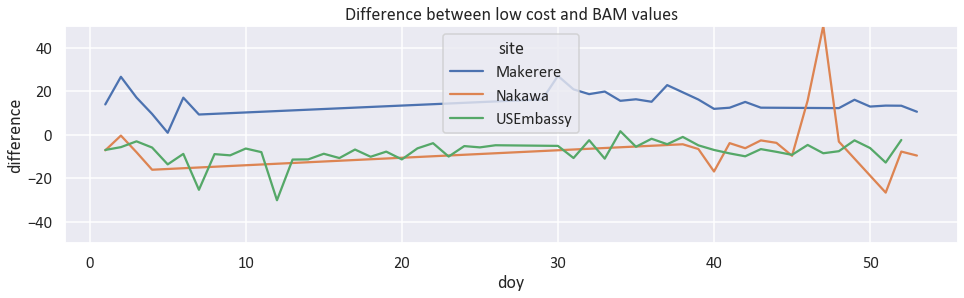

In [130]:
fig, ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=df_doy_grp, x= 'doy', y='difference', hue='site')
plt.title('Difference between low cost and BAM values')
plt.ylim(-50,50)
plt.show()

### Difference by day of the year

In [105]:
df['month'] = df['created_at'].dt.month

In [107]:
df_month_grp = df.groupby(['site', 'month']).mean().reset_index()
df_month_grp.head()

,site,month,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5,difference,hour
0,Makerere,1,51.973411,59.298758,49.329650,57.893200,0.836225,21.674242,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,37.566986,14.406426,11.472089
1,Makerere,2,61.566428,70.586451,58.843681,68.899506,0.787875,23.328122,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,52.434223,9.132205,11.201456
2,Makerere,7,70.341220,79.247783,65.021625,76.131909,0.769517,22.073309,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,47.289003,23.052218,11.662404
3,Makerere,8,58.105215,67.154688,54.369574,64.962614,0.800623,21.644406,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,40.919918,17.185297,11.484311
4,Makerere,9,51.742974,59.838918,48.323279,57.620839,0.841413,21.058769,0.333501,32.568561,1233.0,6340.0,21.0,28.0,8518.0,475.0,35.082267,16.660706,11.578488


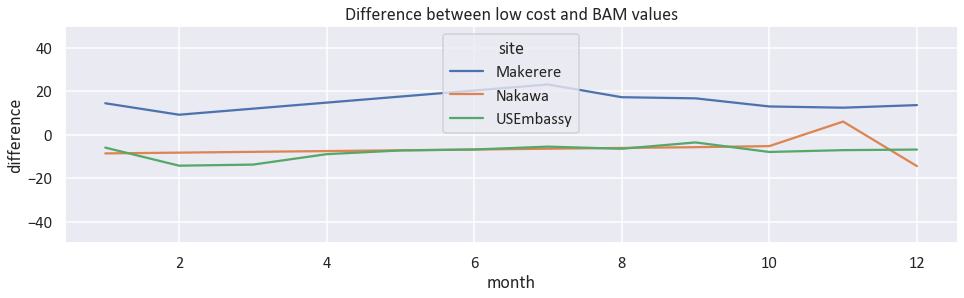

In [108]:
fig, ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=df_month_grp, x= 'month', y='difference', hue='site')
plt.title('Difference between low cost and BAM values')
plt.ylim(-50,50)
plt.show()

Slope: 0.3007082673389725, Intercept: 35.66196018153023
Correlation coefficient:  0.30676290039954307


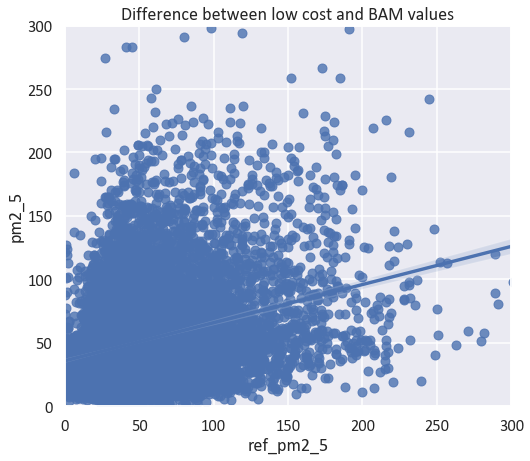

In [134]:
# Calculating the slope and intercept betwee true and prediction
result = stats.linregress(df.ref_pm2_5, df.pm2_5)
print('Slope: {}, Intercept: {}'.format (result[0], result[1]))
print('Correlation coefficient: ', (df.ref_pm2_5.corr( df.pm2_5)))

fig, ax = plt.subplots(figsize=(8,7))
sns.regplot(data=df, y= 'pm2_5', x='ref_pm2_5', fit_reg=True)
plt.title('Difference between low cost and BAM values')
plt.xlim(0,300)
plt.ylim(0,300)
plt.show()

In [110]:
df.ref_pm2_5.value_counts(sort='ascending')

38.0     197
36.0     179
27.0     172
48.0     162
34.0     158
        ... 
198.7      1
109.4      1
127.2      1
130.1      1
154.7      1
Name: ref_pm2_5, Length: 1294, dtype: int64

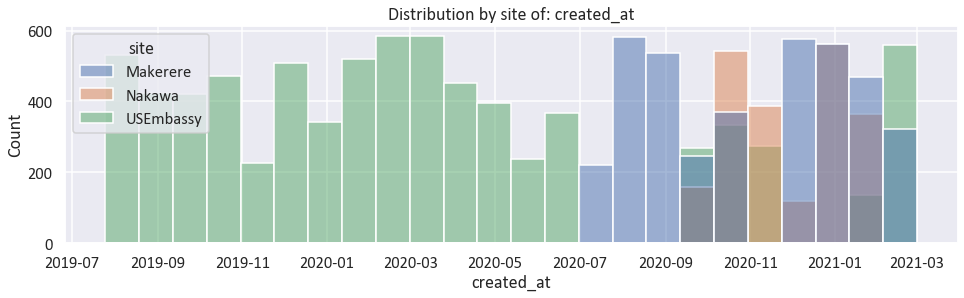

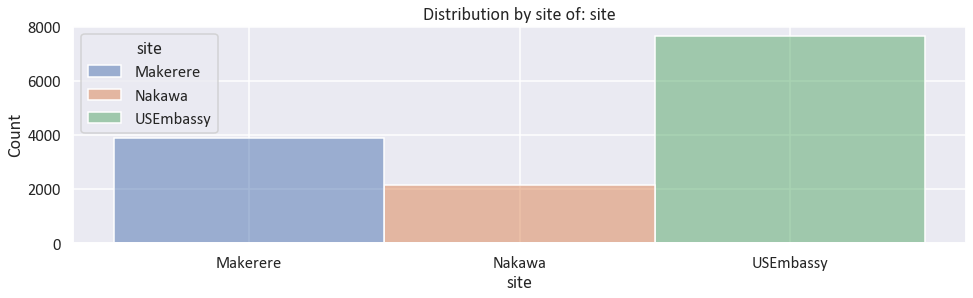

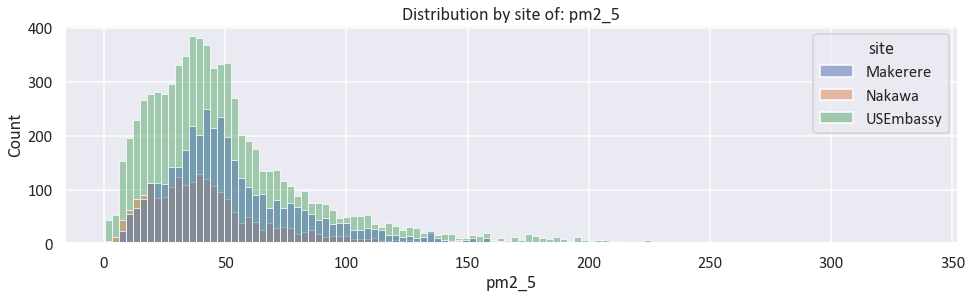

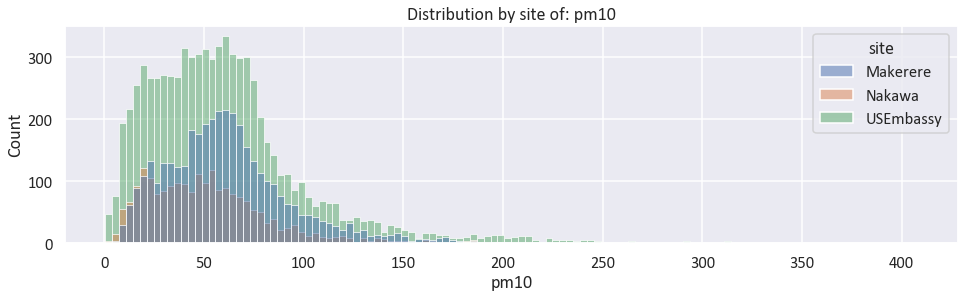

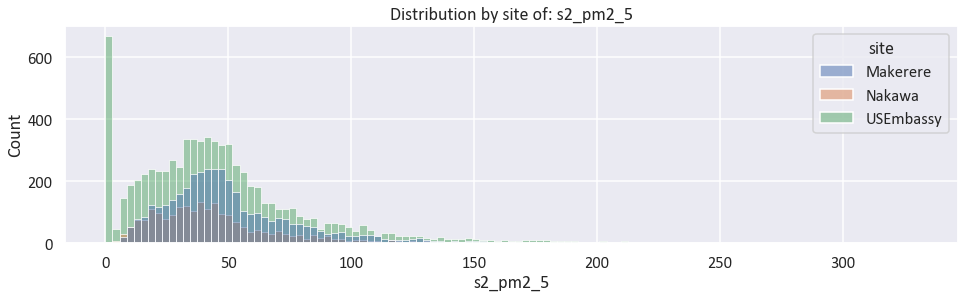

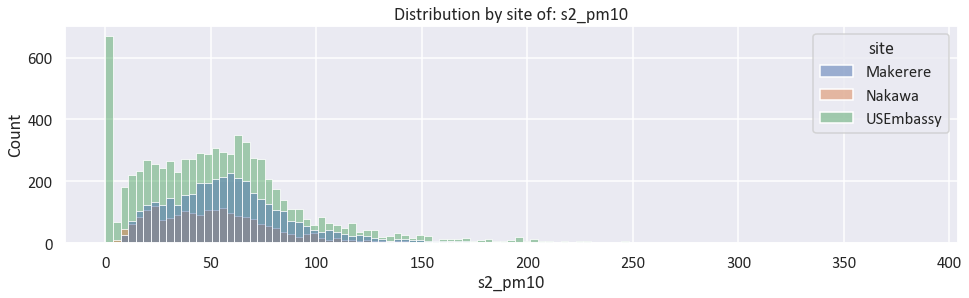

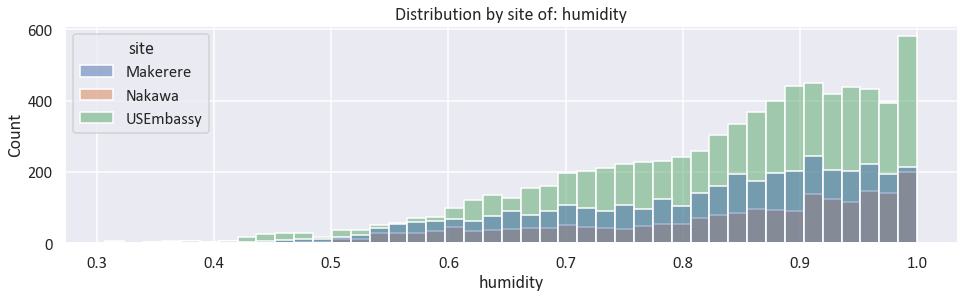

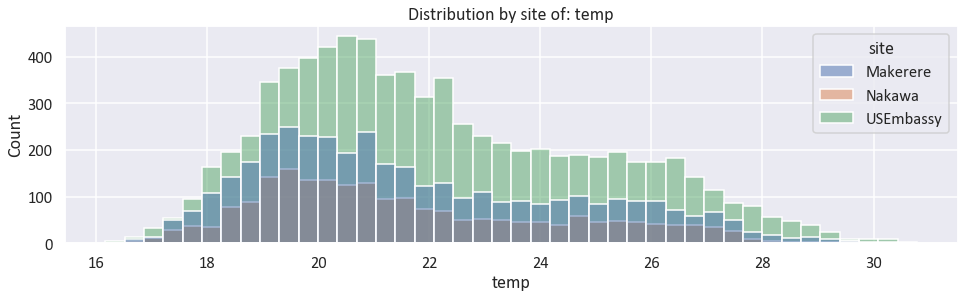

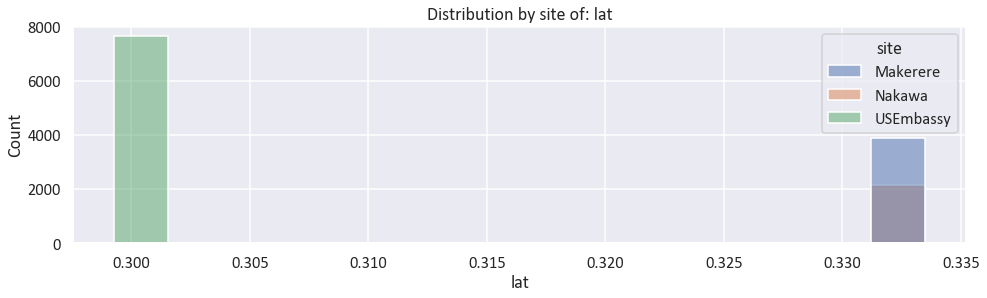

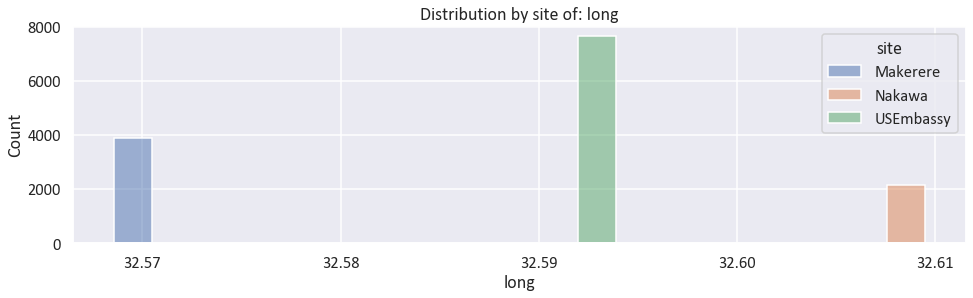

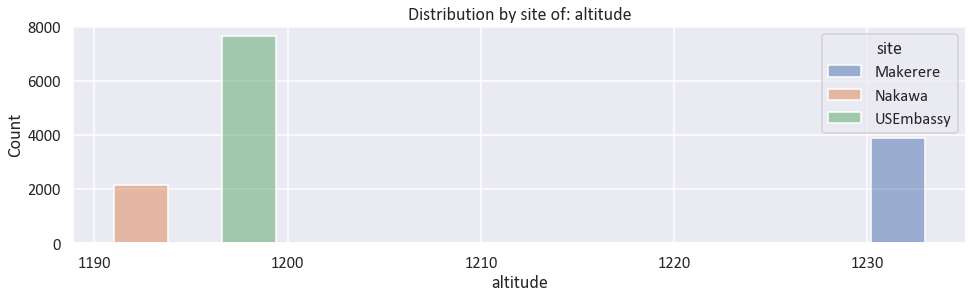

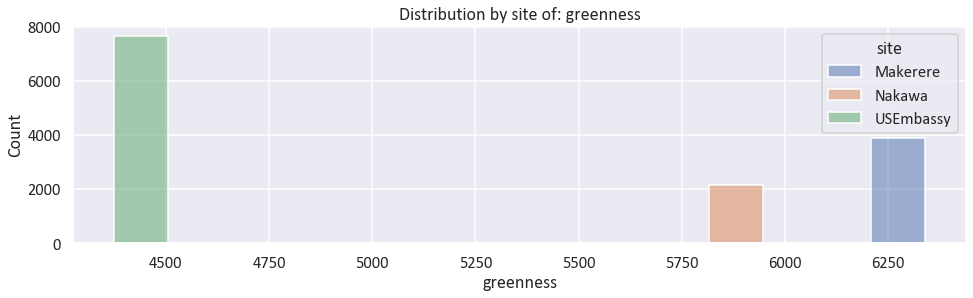

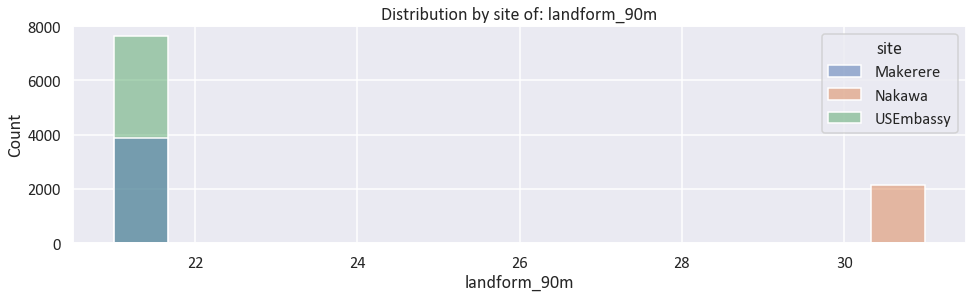

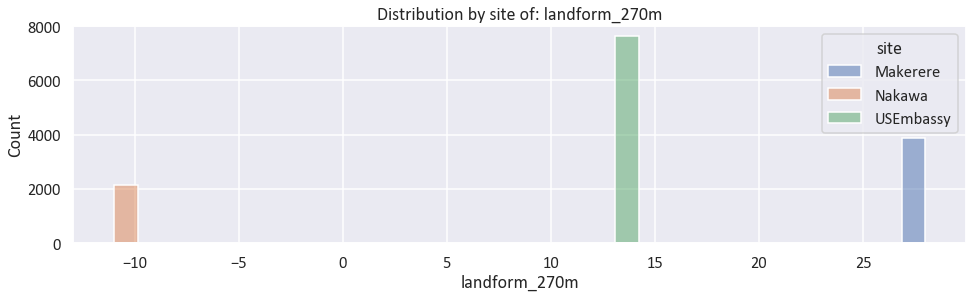

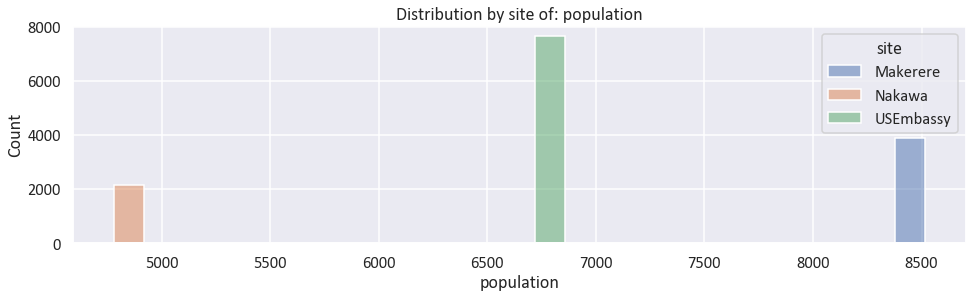

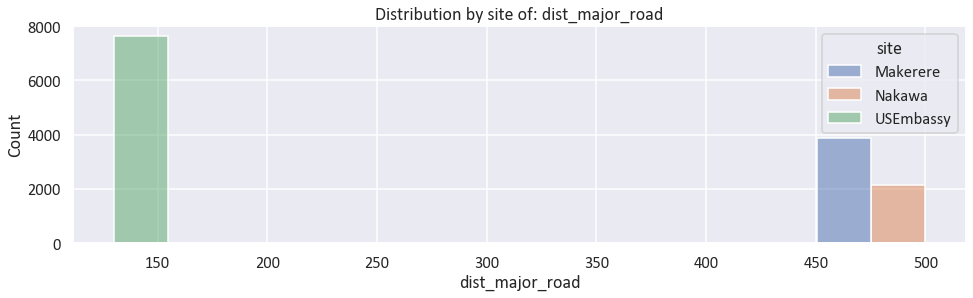

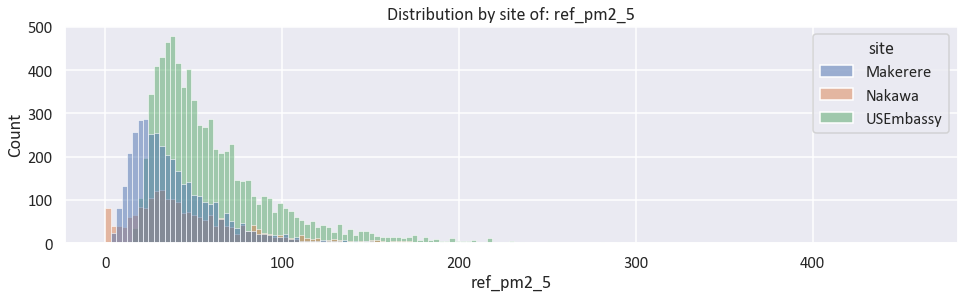

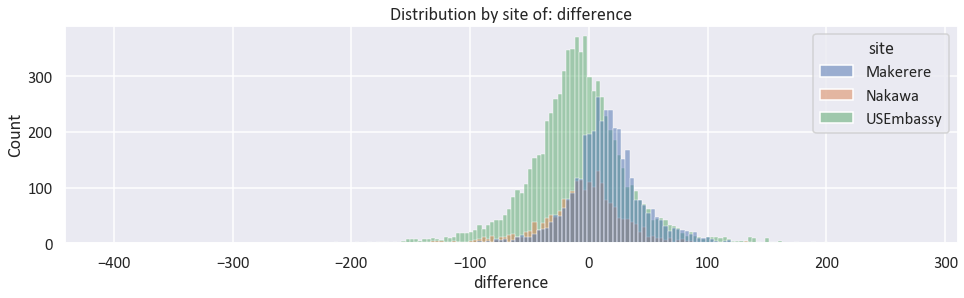

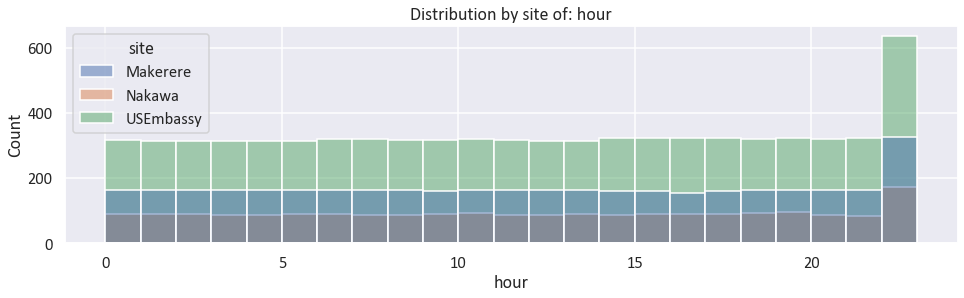

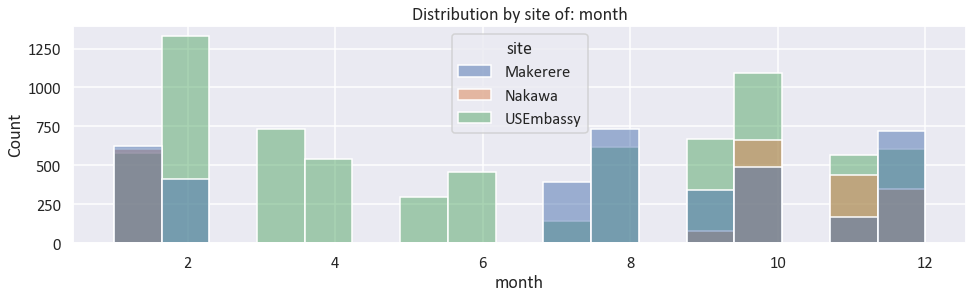

In [111]:
for col in df.columns:
    fig, ax = plt.subplots(figsize=(16,4))
    sns.histplot(data=df, x=col, hue='site')
    plt.title('Distribution by site of: ' +str(col))
    plt.show()

In [ ]:
# Baseline
